# model

In [3]:
import wandb
!wandb login

wandb: Currently logged in as: youngandbin (use `wandb login --relogin` to force relogin)


In [4]:
wandb.init(project="n2d", entity="youngandbin")
wandb.config = {
    "epochs": 1000,
    "batch_size": 64
}

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: youngandbin (use `wandb login --relogin` to force relogin)


# 시각화

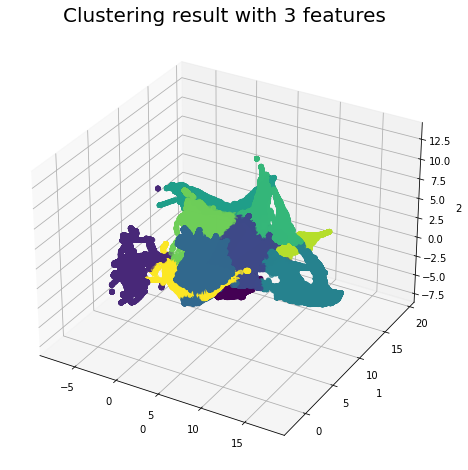

In [11]:
def plot_scatterplot(df, features):

    if len(features) == 2:
        g = sns.relplot(
            data=df, y=df[features[0]], x=df[features[1]], hue="cluster")
        g.fig.suptitle("Clustering result with 2 features")
    elif len(features) == 3:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(df[features[0]], df[features[1]],
                   df[features[2]], c=df['cluster'])
        ax.set_title('Clustering result with 3 features', fontsize=20)
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])
        ax.set_zlabel(features[2])
    else:
        print('you can plot only 2 or 3 features')

latent_2_df = pd.DataFrame(latent_2)
latent_2_df['cluster'] = list(pred)

plot_scatterplot(latent_2_df, [0, 1, 2])

# 요약 테이블

In [12]:
def display_avg_table(data):

  df = data.copy()

  # 라벨 붙이기
  df['cluster'] = pred

  # 클러스터 관측 수 많은 순으로 정렬
  as_is_list = df.cluster.value_counts().keys()
  to_be_list = range(1, k+1)
  replacing_dict = dict(zip(as_is_list, to_be_list))
  df['cluster'] = df['cluster'].replace(replacing_dict)

  # feature 정렬: 평균 소비 비율 높은 순
  features_sorted = df[features].mean().sort_values(
      ascending=False).keys().tolist()
    
  # 평균 계산을 위해 숫자로 변환
  df['성별'] = df['성별'].replace({'여성': 0, '남성': 1})
  df['연령대별'] = df['연령대별'].replace({'20세 미만': 10, '20대': 20, '30대': 30,
                                          '40대': 40, '50대': 50,
                                           '60대 이상': 60})
  df['연평균소득추정'] = df['연평균소득추정'].apply(lambda x: x[1:]).astype(int)
  df['지역'] = df['지역'].replace({'수도권' : 1,
                                    '부산울산권':0, '대구권':0, '광주권':0, '대전권':0, '기타':0})

  # 전체평균선
  features_means = df.mean()
  mean_vector = pd.DataFrame(features_means).T
  mean_vector = mean_vector.rename(index={0: '평균'})
  mean_vector = mean_vector.drop(columns=['cluster'])

  # 요약 테이블 시각화
  df_table = df.groupby('cluster').mean()
  df_table = pd.concat([df_table, mean_vector])
  df_table = df_table.loc[:, '성별':'주거'] # 년,월 제외

  # 정렬
  df_table = df_table[info_features[4:] + features_sorted]
  df_table = df_table.sort_values(by=['연평균소득추정'], ascending=False)

  # 색칠
  global cm
  cm = sns.light_palette("blue", as_cmap=True)
  df_table = df_table.style.background_gradient(cmap=cm)

  return df_table


display_avg_table(df)


,성별,연령대별,연평균소득추정,지역,음식점,종합소매,개인운송,대형판매,오락_문화,보건,식료품,전자상거래,교육서비스,여객운송,의류_잡화,숙박서비스,개인미용,주거,기타,가정용품,보험,정보통신
8,0.853819,49.161447,6.314629,0.149603,0.169935,0.077856,0.371024,0.017665,0.299895,0.013727,0.021206,0.000869,0.000693,0.001035,0.002261,0.005738,0.001714,0.010150,0.005180,0.000962,0.000044,0.000045
9,0.480912,38.375916,5.994759,0.533441,0.159706,0.083803,0.034924,0.368917,0.035435,0.024865,0.021822,0.023021,0.004843,0.215541,0.006160,0.004613,0.005081,0.003718,0.003027,0.001839,0.001031,0.001653
6,0.532957,39.237401,5.826228,0.855111,0.126493,0.060406,0.021477,0.059019,0.021568,0.048328,0.014684,0.402684,0.008424,0.026314,0.015625,0.003195,0.017426,0.013388,0.035496,0.046549,0.043763,0.035161
10,0.573541,27.807774,5.721407,0.212389,0.614028,0.381024,0.000055,0.000011,0.001808,0.000037,0.002905,0.000004,0.000007,0.000041,0.000034,0.000012,0.000007,0.000009,0.000013,0.000000,0.000000,0.000006
2,0.741569,45.341831,5.033176,0.117261,0.284840,0.185451,0.245422,0.027446,0.043269,0.031541,0.087798,0.000269,0.005107,0.001685,0.006690,0.046780,0.005749,0.015657,0.008919,0.003102,0.000131,0.000144
4,0.594823,21.166950,5.023706,0.387079,0.504563,0.230139,0.012968,0.049027,0.092221,0.013586,0.036710,0.002343,0.001275,0.005035,0.021825,0.003591,0.014365,0.003464,0.005025,0.000882,0.000797,0.002185
1,0.606741,41.475885,4.893717,0.380537,0.307616,0.184171,0.100117,0.149813,0.047985,0.076573,0.042554,0.004451,0.011804,0.004172,0.017289,0.008845,0.017132,0.011950,0.006738,0.007452,0.000579,0.000760
평균,0.586399,38.074613,4.830604,0.340962,0.293881,0.202817,0.107292,0.089085,0.061216,0.060548,0.044528,0.032982,0.018865,0.016168,0.014266,0.012884,0.012699,0.009800,0.008211,0.007665,0.003750,0.003342
5,0.418803,52.533565,4.089644,0.374814,0.218671,0.171152,0.067013,0.110247,0.030469,0.254905,0.054130,0.001948,0.005190,0.003161,0.023599,0.003955,0.021207,0.011742,0.007251,0.013126,0.001760,0.000474
3,0.702071,27.558134,3.716692,0.263847,0.315136,0.405301,0.062252,0.044968,0.050138,0.025157,0.037260,0.001170,0.004498,0.003045,0.014100,0.010901,0.011749,0.007195,0.004141,0.001934,0.000079,0.000976
